# M.ª de los Ángeles Martín de la Cruz

GaussianNB - Cross Validation Accuracy: 0.95


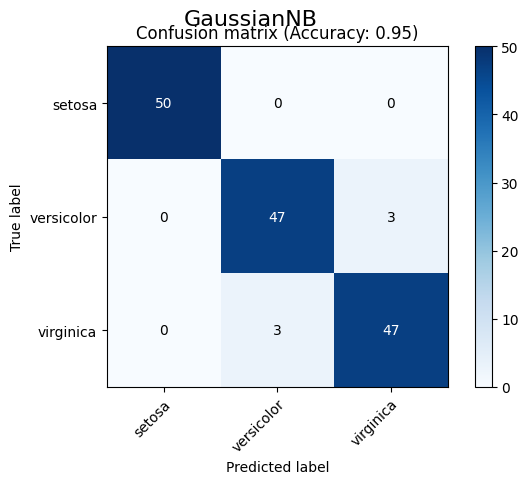

MultinomialNB - Cross Validation Accuracy: 0.95


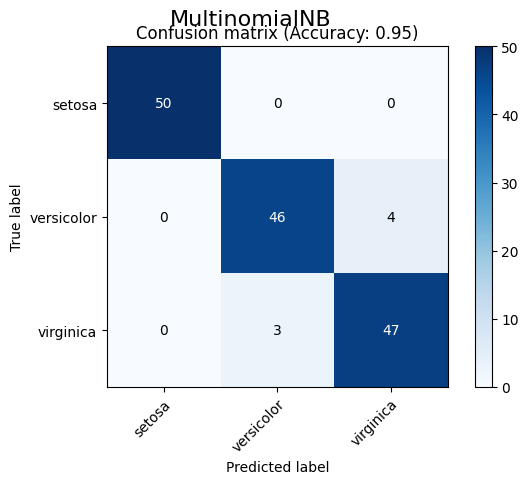

ComplementNB - Cross Validation Accuracy: 0.67


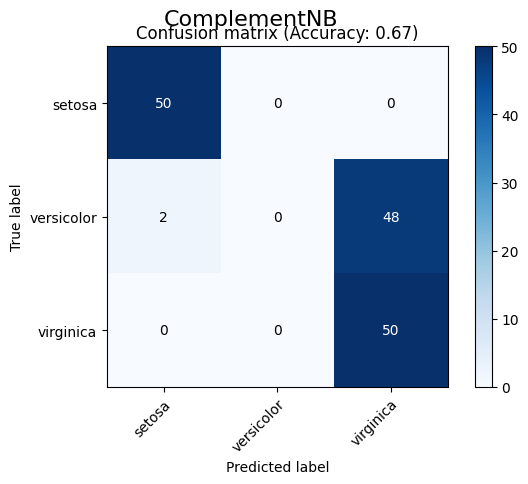

BernoulliNB - Cross Validation Accuracy: 0.33


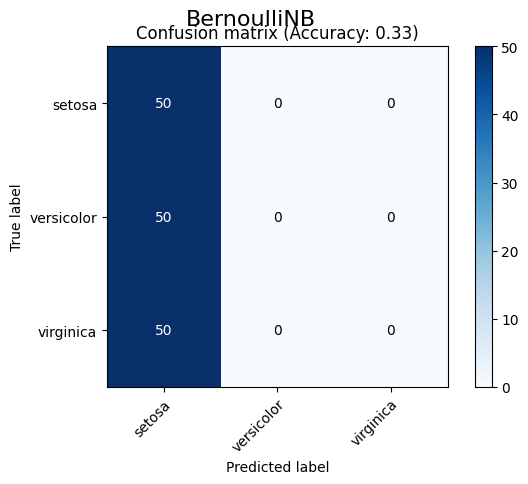

CategoricalNB - Cross Validation Accuracy: 0.93


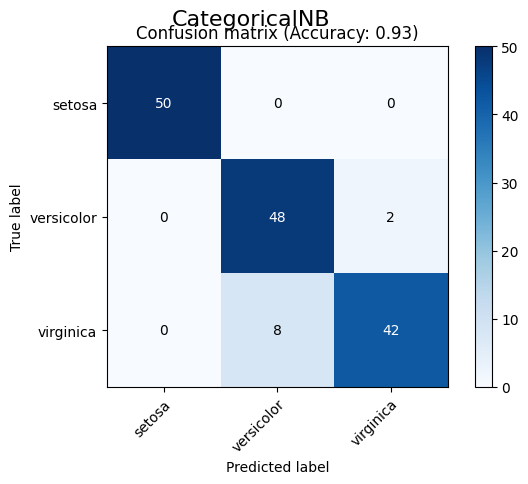

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB, CategoricalNB, ComplementNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Cargamos el conjunto de datos
iris = sns.load_dataset('iris')

# Separamos los datos de entrada y salida
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# Definimos las clases
clases_iris = np.array(['setosa', 'versicolor', 'virginica'])

# Función para la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues, titleSup=None):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = title or 'Normalized confusion matrix'
    else:
        title = title or 'Confusion matrix, without normalization'

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if titleSup:
        fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    plt.show()

# Función para evaluar un modelo usando validación cruzada y mostrar resultados
def evaluate_model_with_cross_val(model, X, y, clases, titleSup):
    # Usamos StratifiedKFold para asegurar que la distribución de clases sea similar en cada partición
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    # Evaluamos el modelo con validación cruzada
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    # Calculamos la precisión media de la validación cruzada
    mean_accuracy = np.mean(scores)

    # Mostramos la precisión media de la validación cruzada
    print(f'{titleSup} - Cross Validation Accuracy: {mean_accuracy:.2f}')

    # Entrenamos el modelo sobre todo el conjunto de datos y calculamos las predicciones
    model.fit(X, y)
    y_pred = model.predict(X)

    # Visualizamos la matriz de confusión para todo el conjunto
    plot_confusion_matrix(
        y,
        y_pred,
        classes=clases,
        normalize=False,
        title=f'Confusion matrix (Accuracy: {mean_accuracy:.2f})',
        titleSup=titleSup
    )

# Diccionario de modelos de Naive Bayes para evaluar
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "CategoricalNB": CategoricalNB()
}

# Evaluamos cada modelo con validación cruzada
for name, model in models.items():
    evaluate_model_with_cross_val(model, X_iris, y_iris, clases_iris, titleSup=name)
